In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
%matplotlib inline
plt.style.use('seaborn')
import pickle

C:\Users\tani_\AppData\Local\Temp\ipykernel_11592\1889302529.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
df = pd.read_csv('data/train.csv')
df.head(10)

,animal_id,lactation,calving_date,farm,farmgroup,birth_date,milk_yield_1,milk_yield_2,milk_yield_3,milk_yield_4,milk_yield_5,milk_yield_6,milk_yield_7,milk_yield_8,milk_yield_9,milk_yield_10
0,ID_0000732131,1,2018-11-11,2104,4463,2016-10-02,19.2,21.4,NaN,30.7,28.6,28.1,NaN,31.1,25.5,26.1
1,ID_0000732194,1,2013-05-01,2104,4463,2011-05-19,16.7,15.9,14.4,20.4,14.3,23.2,21.0,22.0,23.3,22.5
2,ID_0000732195,1,2013-05-17,2104,4463,2011-06-01,15.8,14.4,19.3,23.1,31.8,24.7,30.9,32.3,32.7,33.1
3,ID_0000732195,2,2014-06-16,2104,4463,2011-06-01,43.7,39.9,39.2,33.2,40.3,44.8,39.3,40.1,40.5,37.7
4,ID_0000732338,1,2013-05-18,2104,4463,2011-07-11,13.8,13.2,29.9,26.4,31.3,17.6,25.8,25.6,24.5,19.8
5,ID_0000732338,2,2014-09-18,2104,4463,2011-07-11,45.6,44.4,45.8,41.9,34.5,32.0,30.7,29.3,27.2,NaN
6,ID_0000732354,1,2014-06-06,2107,4463,2012-07-31,32.0,32.3,34.3,35.4,NaN,34.3,33.6,32.8,34.3,31.7
7,ID_0000732354,3,2016-07-23,2107,4463,2012-07-31,26.3,41.2,42.1,39.9,39.9,37.7,39.2,35.4,33.4,37.3
8,ID_0000732354,4,2017-09-17,2107,4463,2012-07-31,18.0,33.2,15.0,30.0,43.4,38.7,39.0,36.6,33.9,27.2
9,ID_0000732429,1,2016-09-24,2104,4463,2014-12-03,33.5,34.3,34.3,34.2,22.5,36.8,32.1,32.1,35.9,34.8


In [3]:
df[df['animal_id'] == 'ID_0000847685'].head()

,animal_id,lactation,calving_date,farm,farmgroup,birth_date,milk_yield_1,milk_yield_2,milk_yield_3,milk_yield_4,milk_yield_5,milk_yield_6,milk_yield_7,milk_yield_8,milk_yield_9,milk_yield_10
47605,ID_0000847685,2,2014-07-21,2732,6141,2011-03-17,21.8,26.2,24.7,22.7,20.6,NaN,16.0,13.05,NaN,10.0
47606,ID_0000847685,4,2016-10-12,2732,6141,2011-03-17,28.0,23.1,25.3,29.3,28.7,32.9,21.3,26.60,27.4,21.2


In [4]:
df_pedigree = pd.read_csv('data/pedigree.csv')
df_pedigree.head(3)

,animal_id,mother_id,father_id
0,ID_0000746349,ID_0001124748,ID_0000763165
1,ID_0000948913,ID_0000942629,ID_0000772393
2,ID_0001143149,ID_0001141490,ID_0000863421


In [5]:
display(df.info())
display(df_pedigree.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155575 entries, 0 to 155574
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   animal_id      155575 non-null  object 
 1   lactation      155575 non-null  int64  
 2   calving_date   155575 non-null  object 
 3   farm           155575 non-null  int64  
 4   farmgroup      155575 non-null  int64  
 5   birth_date     155575 non-null  object 
 6   milk_yield_1   155575 non-null  float64
 7   milk_yield_2   155575 non-null  float64
 8   milk_yield_3   151068 non-null  float64
 9   milk_yield_4   151634 non-null  float64
 10  milk_yield_5   151457 non-null  float64
 11  milk_yield_6   150373 non-null  float64
 12  milk_yield_7   150938 non-null  float64
 13  milk_yield_8   151065 non-null  float64
 14  milk_yield_9   147880 non-null  float64
 15  milk_yield_10  126179 non-null  float64
dtypes: float64(10), int64(3), object(3)
memory usage: 19.0+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158368 entries, 0 to 158367
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   animal_id  158368 non-null  object
 1   mother_id  154767 non-null  object
 2   father_id  158026 non-null  object
dtypes: object(3)
memory usage: 3.6+ MB


None

In [6]:
df_joined = df.join(
    df_pedigree.set_index('animal_id'),
    on='animal_id',
    how='left'
)
display(df_joined.head(3))
display(df_joined.info())

,animal_id,lactation,calving_date,farm,farmgroup,birth_date,milk_yield_1,milk_yield_2,milk_yield_3,milk_yield_4,milk_yield_5,milk_yield_6,milk_yield_7,milk_yield_8,milk_yield_9,milk_yield_10,mother_id,father_id
0,ID_0000732131,1,2018-11-11,2104,4463,2016-10-02,19.2,21.4,NaN,30.7,28.6,28.1,NaN,31.1,25.5,26.1,ID_0000741349,ID_0000747757
1,ID_0000732194,1,2013-05-01,2104,4463,2011-05-19,16.7,15.9,14.4,20.4,14.3,23.2,21.0,22.0,23.3,22.5,ID_0000742916,ID_0000743194
2,ID_0000732195,1,2013-05-17,2104,4463,2011-06-01,15.8,14.4,19.3,23.1,31.8,24.7,30.9,32.3,32.7,33.1,ID_0000740204,ID_0000742534


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155575 entries, 0 to 155574
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   animal_id      155575 non-null  object 
 1   lactation      155575 non-null  int64  
 2   calving_date   155575 non-null  object 
 3   farm           155575 non-null  int64  
 4   farmgroup      155575 non-null  int64  
 5   birth_date     155575 non-null  object 
 6   milk_yield_1   155575 non-null  float64
 7   milk_yield_2   155575 non-null  float64
 8   milk_yield_3   151068 non-null  float64
 9   milk_yield_4   151634 non-null  float64
 10  milk_yield_5   151457 non-null  float64
 11  milk_yield_6   150373 non-null  float64
 12  milk_yield_7   150938 non-null  float64
 13  milk_yield_8   151065 non-null  float64
 14  milk_yield_9   147880 non-null  float64
 15  milk_yield_10  126179 non-null  float64
 16  mother_id      153811 non-null  object 
 17  father_id      155277 non-nul

None

In [7]:
# поиск строк-дубликатов 
dupl = df_joined[df_joined.duplicated()]
dupl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   animal_id      0 non-null      object 
 1   lactation      0 non-null      int64  
 2   calving_date   0 non-null      object 
 3   farm           0 non-null      int64  
 4   farmgroup      0 non-null      int64  
 5   birth_date     0 non-null      object 
 6   milk_yield_1   0 non-null      float64
 7   milk_yield_2   0 non-null      float64
 8   milk_yield_3   0 non-null      float64
 9   milk_yield_4   0 non-null      float64
 10  milk_yield_5   0 non-null      float64
 11  milk_yield_6   0 non-null      float64
 12  milk_yield_7   0 non-null      float64
 13  milk_yield_8   0 non-null      float64
 14  milk_yield_9   0 non-null      float64
 15  milk_yield_10  0 non-null      float64
 16  mother_id      0 non-null      object 
 17  father_id      0 non-null      object 
dtypes: float64(10), int64(3), o

<Axes: >

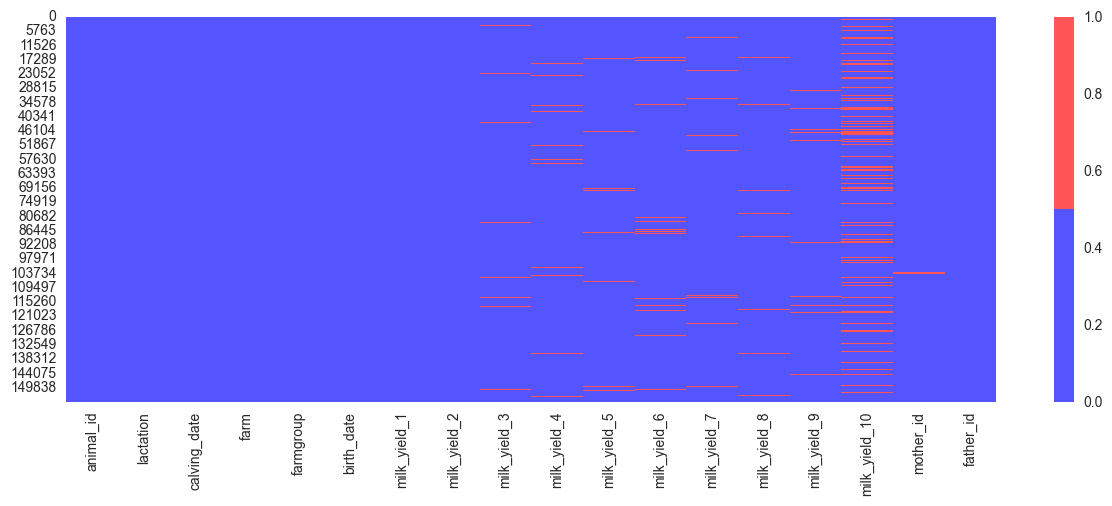

In [8]:
# построим тепловую карту пропущенных значений в признаках
cols = df_joined.columns[:]
# красные - пропущенные данные, синий - не пропущенные
colours = ['#5555FF', '#FF5555'] 
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(df_joined[cols].isnull(), cmap=sns.color_palette(colours))

In [9]:
# поиск признаков, где доля пропусков больше 0.
cols_null_percent = df_joined.isnull().mean() * 100
cols_with_null = round(cols_null_percent[cols_null_percent>0].sort_values(ascending=False),1)
display(cols_with_null)

milk_yield_10    18.9
milk_yield_9      4.9
milk_yield_6      3.3
milk_yield_7      3.0
milk_yield_8      2.9
milk_yield_3      2.9
milk_yield_5      2.6
milk_yield_4      2.5
mother_id         1.1
father_id         0.2
dtype: float64

Переведем в формат даты признаки calving_date и birth_date

In [10]:
df_joined['calving_date'] = pd.to_datetime(df_joined['calving_date']) 
df_joined['birth_date'] = pd.to_datetime(df_joined['birth_date']) 
df_joined.head(3)

,animal_id,lactation,calving_date,farm,farmgroup,birth_date,milk_yield_1,milk_yield_2,milk_yield_3,milk_yield_4,milk_yield_5,milk_yield_6,milk_yield_7,milk_yield_8,milk_yield_9,milk_yield_10,mother_id,father_id
0,ID_0000732131,1,2018-11-11,2104,4463,2016-10-02,19.2,21.4,NaN,30.7,28.6,28.1,NaN,31.1,25.5,26.1,ID_0000741349,ID_0000747757
1,ID_0000732194,1,2013-05-01,2104,4463,2011-05-19,16.7,15.9,14.4,20.4,14.3,23.2,21.0,22.0,23.3,22.5,ID_0000742916,ID_0000743194
2,ID_0000732195,1,2013-05-17,2104,4463,2011-06-01,15.8,14.4,19.3,23.1,31.8,24.7,30.9,32.3,32.7,33.1,ID_0000740204,ID_0000742534


In [11]:
df_joined[df_joined['animal_id'] == 'ID_0000732195'].head()

,animal_id,lactation,calving_date,farm,farmgroup,birth_date,milk_yield_1,milk_yield_2,milk_yield_3,milk_yield_4,milk_yield_5,milk_yield_6,milk_yield_7,milk_yield_8,milk_yield_9,milk_yield_10,mother_id,father_id
2,ID_0000732195,1,2013-05-17,2104,4463,2011-06-01,15.8,14.4,19.3,23.1,31.8,24.7,30.9,32.3,32.7,33.1,ID_0000740204,ID_0000742534
3,ID_0000732195,2,2014-06-16,2104,4463,2011-06-01,43.7,39.9,39.2,33.2,40.3,44.8,39.3,40.1,40.5,37.7,ID_0000740204,ID_0000742534


In [12]:
df_joined['age_to_lactation'] = df_joined['calving_date'] - df_joined['birth_date']
df_joined['day_of_1st_lact'] = df_joined['calving_date'].dt.day
df_joined['month_of_1st_lact'] = df_joined['calving_date'].dt.month
df_joined['year_of_lact'] = df_joined['calving_date'].dt.year
df_joined['day_of_birth'] = df_joined['birth_date'].dt.day
df_joined['month_of_birth'] = df_joined['birth_date'].dt.month
df_joined['year_of_birth'] = df_joined['birth_date'].dt.year
df_joined.head(10)

,animal_id,lactation,calving_date,farm,farmgroup,birth_date,milk_yield_1,milk_yield_2,milk_yield_3,milk_yield_4,...,milk_yield_10,mother_id,father_id,age_to_lactation,day_of_1st_lact,month_of_1st_lact,year_of_lact,day_of_birth,month_of_birth,year_of_birth
0,ID_0000732131,1,2018-11-11,2104,4463,2016-10-02,19.2,21.4,NaN,30.7,...,26.1,ID_0000741349,ID_0000747757,770 days,11,11,2018,2,10,2016
1,ID_0000732194,1,2013-05-01,2104,4463,2011-05-19,16.7,15.9,14.4,20.4,...,22.5,ID_0000742916,ID_0000743194,713 days,1,5,2013,19,5,2011
2,ID_0000732195,1,2013-05-17,2104,4463,2011-06-01,15.8,14.4,19.3,23.1,...,33.1,ID_0000740204,ID_0000742534,716 days,17,5,2013,1,6,2011
3,ID_0000732195,2,2014-06-16,2104,4463,2011-06-01,43.7,39.9,39.2,33.2,...,37.7,ID_0000740204,ID_0000742534,1111 days,16,6,2014,1,6,2011
4,ID_0000732338,1,2013-05-18,2104,4463,2011-07-11,13.8,13.2,29.9,26.4,...,19.8,ID_0000743339,ID_0000743366,677 days,18,5,2013,11,7,2011
5,ID_0000732338,2,2014-09-18,2104,4463,2011-07-11,45.6,44.4,45.8,41.9,...,NaN,ID_0000743339,ID_0000743366,1165 days,18,9,2014,11,7,2011
6,ID_0000732354,1,2014-06-06,2107,4463,2012-07-31,32.0,32.3,34.3,35.4,...,31.7,ID_0000732843,ID_0000733739,675 days,6,6,2014,31,7,2012
7,ID_0000732354,3,2016-07-23,2107,4463,2012-07-31,26.3,41.2,42.1,39.9,...,37.3,ID_0000732843,ID_0000733739,1453 days,23,7,2016,31,7,2012
8,ID_0000732354,4,2017-09-17,2107,4463,2012-07-31,18.0,33.2,15.0,30.0,...,27.2,ID_0000732843,ID_0000733739,1874 days,17,9,2017,31,7,2012
9,ID_0000732429,1,2016-09-24,2104,4463,2014-12-03,33.5,34.3,34.3,34.2,...,34.8,ID_0000740461,ID_0000733344,661 days,24,9,2016,3,12,2014


Заполним значения суточного надоя средним значением в тех признаках, в которых эти значения отсутствуют.

In [13]:
df_joined['milk_mean'] = round(df_joined[['milk_yield_1', 'milk_yield_2', 'milk_yield_3', 'milk_yield_4',
    'milk_yield_5', 'milk_yield_6', 'milk_yield_7', 'milk_yield_8', 'milk_yield_9', 'milk_yield_10']].mean(axis=1),1)
df_joined.head(7)

,animal_id,lactation,calving_date,farm,farmgroup,birth_date,milk_yield_1,milk_yield_2,milk_yield_3,milk_yield_4,...,mother_id,father_id,age_to_lactation,day_of_1st_lact,month_of_1st_lact,year_of_lact,day_of_birth,month_of_birth,year_of_birth,milk_mean
0,ID_0000732131,1,2018-11-11,2104,4463,2016-10-02,19.2,21.4,NaN,30.7,...,ID_0000741349,ID_0000747757,770 days,11,11,2018,2,10,2016,26.3
1,ID_0000732194,1,2013-05-01,2104,4463,2011-05-19,16.7,15.9,14.4,20.4,...,ID_0000742916,ID_0000743194,713 days,1,5,2013,19,5,2011,19.4
2,ID_0000732195,1,2013-05-17,2104,4463,2011-06-01,15.8,14.4,19.3,23.1,...,ID_0000740204,ID_0000742534,716 days,17,5,2013,1,6,2011,25.8
3,ID_0000732195,2,2014-06-16,2104,4463,2011-06-01,43.7,39.9,39.2,33.2,...,ID_0000740204,ID_0000742534,1111 days,16,6,2014,1,6,2011,39.9
4,ID_0000732338,1,2013-05-18,2104,4463,2011-07-11,13.8,13.2,29.9,26.4,...,ID_0000743339,ID_0000743366,677 days,18,5,2013,11,7,2011,22.8
5,ID_0000732338,2,2014-09-18,2104,4463,2011-07-11,45.6,44.4,45.8,41.9,...,ID_0000743339,ID_0000743366,1165 days,18,9,2014,11,7,2011,36.8
6,ID_0000732354,1,2014-06-06,2107,4463,2012-07-31,32.0,32.3,34.3,35.4,...,ID_0000732843,ID_0000733739,675 days,6,6,2014,31,7,2012,33.4


In [14]:
df_joined['milk_yield_1'] = df_joined['milk_yield_1'].fillna(df_joined['milk_mean'])
df_joined['milk_yield_2'] = df_joined['milk_yield_2'].fillna(df_joined['milk_mean'])
df_joined['milk_yield_3'] = df_joined['milk_yield_3'].fillna(df_joined['milk_mean'])
df_joined['milk_yield_4'] = df_joined['milk_yield_4'].fillna(df_joined['milk_mean'])
df_joined['milk_yield_5'] = df_joined['milk_yield_5'].fillna(df_joined['milk_mean'])
df_joined['milk_yield_6'] = df_joined['milk_yield_6'].fillna(df_joined['milk_mean'])
df_joined['milk_yield_7'] = df_joined['milk_yield_7'].fillna(df_joined['milk_mean'])
df_joined['milk_yield_8'] = df_joined['milk_yield_8'].fillna(df_joined['milk_mean'])
df_joined['milk_yield_9'] = df_joined['milk_yield_9'].fillna(df_joined['milk_mean'])
df_joined['milk_yield_10'] = df_joined['milk_yield_10'].fillna(df_joined['milk_mean'])

Удалим признак milk_mean

In [15]:
df_joined = df_joined.drop(['milk_mean'], axis=1)

In [16]:
df_joined.head(7)

,animal_id,lactation,calving_date,farm,farmgroup,birth_date,milk_yield_1,milk_yield_2,milk_yield_3,milk_yield_4,...,milk_yield_10,mother_id,father_id,age_to_lactation,day_of_1st_lact,month_of_1st_lact,year_of_lact,day_of_birth,month_of_birth,year_of_birth
0,ID_0000732131,1,2018-11-11,2104,4463,2016-10-02,19.2,21.4,26.3,30.7,...,26.1,ID_0000741349,ID_0000747757,770 days,11,11,2018,2,10,2016
1,ID_0000732194,1,2013-05-01,2104,4463,2011-05-19,16.7,15.9,14.4,20.4,...,22.5,ID_0000742916,ID_0000743194,713 days,1,5,2013,19,5,2011
2,ID_0000732195,1,2013-05-17,2104,4463,2011-06-01,15.8,14.4,19.3,23.1,...,33.1,ID_0000740204,ID_0000742534,716 days,17,5,2013,1,6,2011
3,ID_0000732195,2,2014-06-16,2104,4463,2011-06-01,43.7,39.9,39.2,33.2,...,37.7,ID_0000740204,ID_0000742534,1111 days,16,6,2014,1,6,2011
4,ID_0000732338,1,2013-05-18,2104,4463,2011-07-11,13.8,13.2,29.9,26.4,...,19.8,ID_0000743339,ID_0000743366,677 days,18,5,2013,11,7,2011
5,ID_0000732338,2,2014-09-18,2104,4463,2011-07-11,45.6,44.4,45.8,41.9,...,36.8,ID_0000743339,ID_0000743366,1165 days,18,9,2014,11,7,2011
6,ID_0000732354,1,2014-06-06,2107,4463,2012-07-31,32.0,32.3,34.3,35.4,...,31.7,ID_0000732843,ID_0000733739,675 days,6,6,2014,31,7,2012


<Axes: >

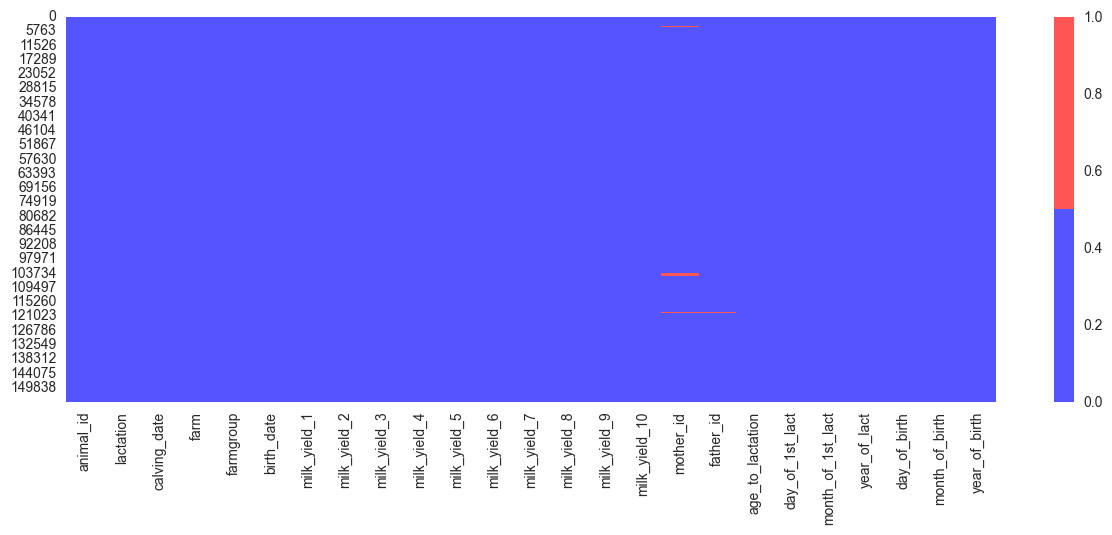

In [17]:
# построим тепловую карту пропущенных значений в признаках
cols = df_joined.columns[:]
# красные - пропущенные данные, синий - не пропущенные
colours = ['#5555FF', '#FF5555'] 
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(df_joined[cols].isnull(), cmap=sns.color_palette(colours))

Удалим строки, в которых пустое значение в признаке mother_id

In [18]:
df_joined = df_joined.dropna(subset=['mother_id'])
df_joined = df_joined.dropna(subset=['father_id'])

В признаке age_to_lactation уберем текст, переведм в числовое значение

In [19]:
df_joined['age_to_lactation'] = df_joined['age_to_lactation'].astype(str)
df_joined['age_to_lactation'] = df_joined['age_to_lactation'].str.replace(' days', '',  regex=True)
df_joined['age_to_lactation'] = df_joined['age_to_lactation'].astype(int)

In [20]:
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153811 entries, 0 to 155574
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   animal_id          153811 non-null  object        
 1   lactation          153811 non-null  int64         
 2   calving_date       153811 non-null  datetime64[ns]
 3   farm               153811 non-null  int64         
 4   farmgroup          153811 non-null  int64         
 5   birth_date         153811 non-null  datetime64[ns]
 6   milk_yield_1       153811 non-null  float64       
 7   milk_yield_2       153811 non-null  float64       
 8   milk_yield_3       153811 non-null  float64       
 9   milk_yield_4       153811 non-null  float64       
 10  milk_yield_5       153811 non-null  float64       
 11  milk_yield_6       153811 non-null  float64       
 12  milk_yield_7       153811 non-null  float64       
 13  milk_yield_8       153811 non-null  float64      

Удалим столбцы calving_date и birth_date

In [21]:
df_joined = df_joined.drop(['calving_date', 'birth_date'], axis=1)

ПРизнаки farm и farmgroup объединим в один признак farm_and_farmgroup

In [22]:
df_joined['farm'] = df_joined['farm'].astype(str)
df_joined['farmgroup'] = df_joined['farmgroup'].astype(str)
df_joined['farm_and_farmgroup'] = df_joined['farm'] + '_' + df_joined['farmgroup']

Удалим столбцы farm и farmgroup

In [23]:
df_joined = df_joined.drop(['farm', 'farmgroup'], axis=1)

In [24]:
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153811 entries, 0 to 155574
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   animal_id           153811 non-null  object 
 1   lactation           153811 non-null  int64  
 2   milk_yield_1        153811 non-null  float64
 3   milk_yield_2        153811 non-null  float64
 4   milk_yield_3        153811 non-null  float64
 5   milk_yield_4        153811 non-null  float64
 6   milk_yield_5        153811 non-null  float64
 7   milk_yield_6        153811 non-null  float64
 8   milk_yield_7        153811 non-null  float64
 9   milk_yield_8        153811 non-null  float64
 10  milk_yield_9        153811 non-null  float64
 11  milk_yield_10       153811 non-null  float64
 12  mother_id           153811 non-null  object 
 13  father_id           153811 non-null  object 
 14  age_to_lactation    153811 non-null  int32  
 15  day_of_1st_lact     153811 non-null  in

Проверим данные на выбросы

Произведем исследование логарифмированных распределений на наличие выбросов с помощью метода z-отклонений (3ех сигм)

In [25]:
# выделим имена числовых признаков в виде списка для удобства дальнейшей работы
# составим список числовых признаков, кроме 'sqft' и 'zipcode' (для этих признаков построим отдельные графики)
types = df_joined.drop(['animal_id', 'mother_id', 'father_id', 'farm_and_farmgroup'], axis=1).dtypes
num_features = list(types[(types != 'object')].index)
num_features

['lactation',
 'milk_yield_1',
 'milk_yield_2',
 'milk_yield_3',
 'milk_yield_4',
 'milk_yield_5',
 'milk_yield_6',
 'milk_yield_7',
 'milk_yield_8',
 'milk_yield_9',
 'milk_yield_10',
 'age_to_lactation',
 'day_of_1st_lact',
 'month_of_1st_lact',
 'year_of_lact',
 'day_of_birth',
 'month_of_birth',
 'year_of_birth']

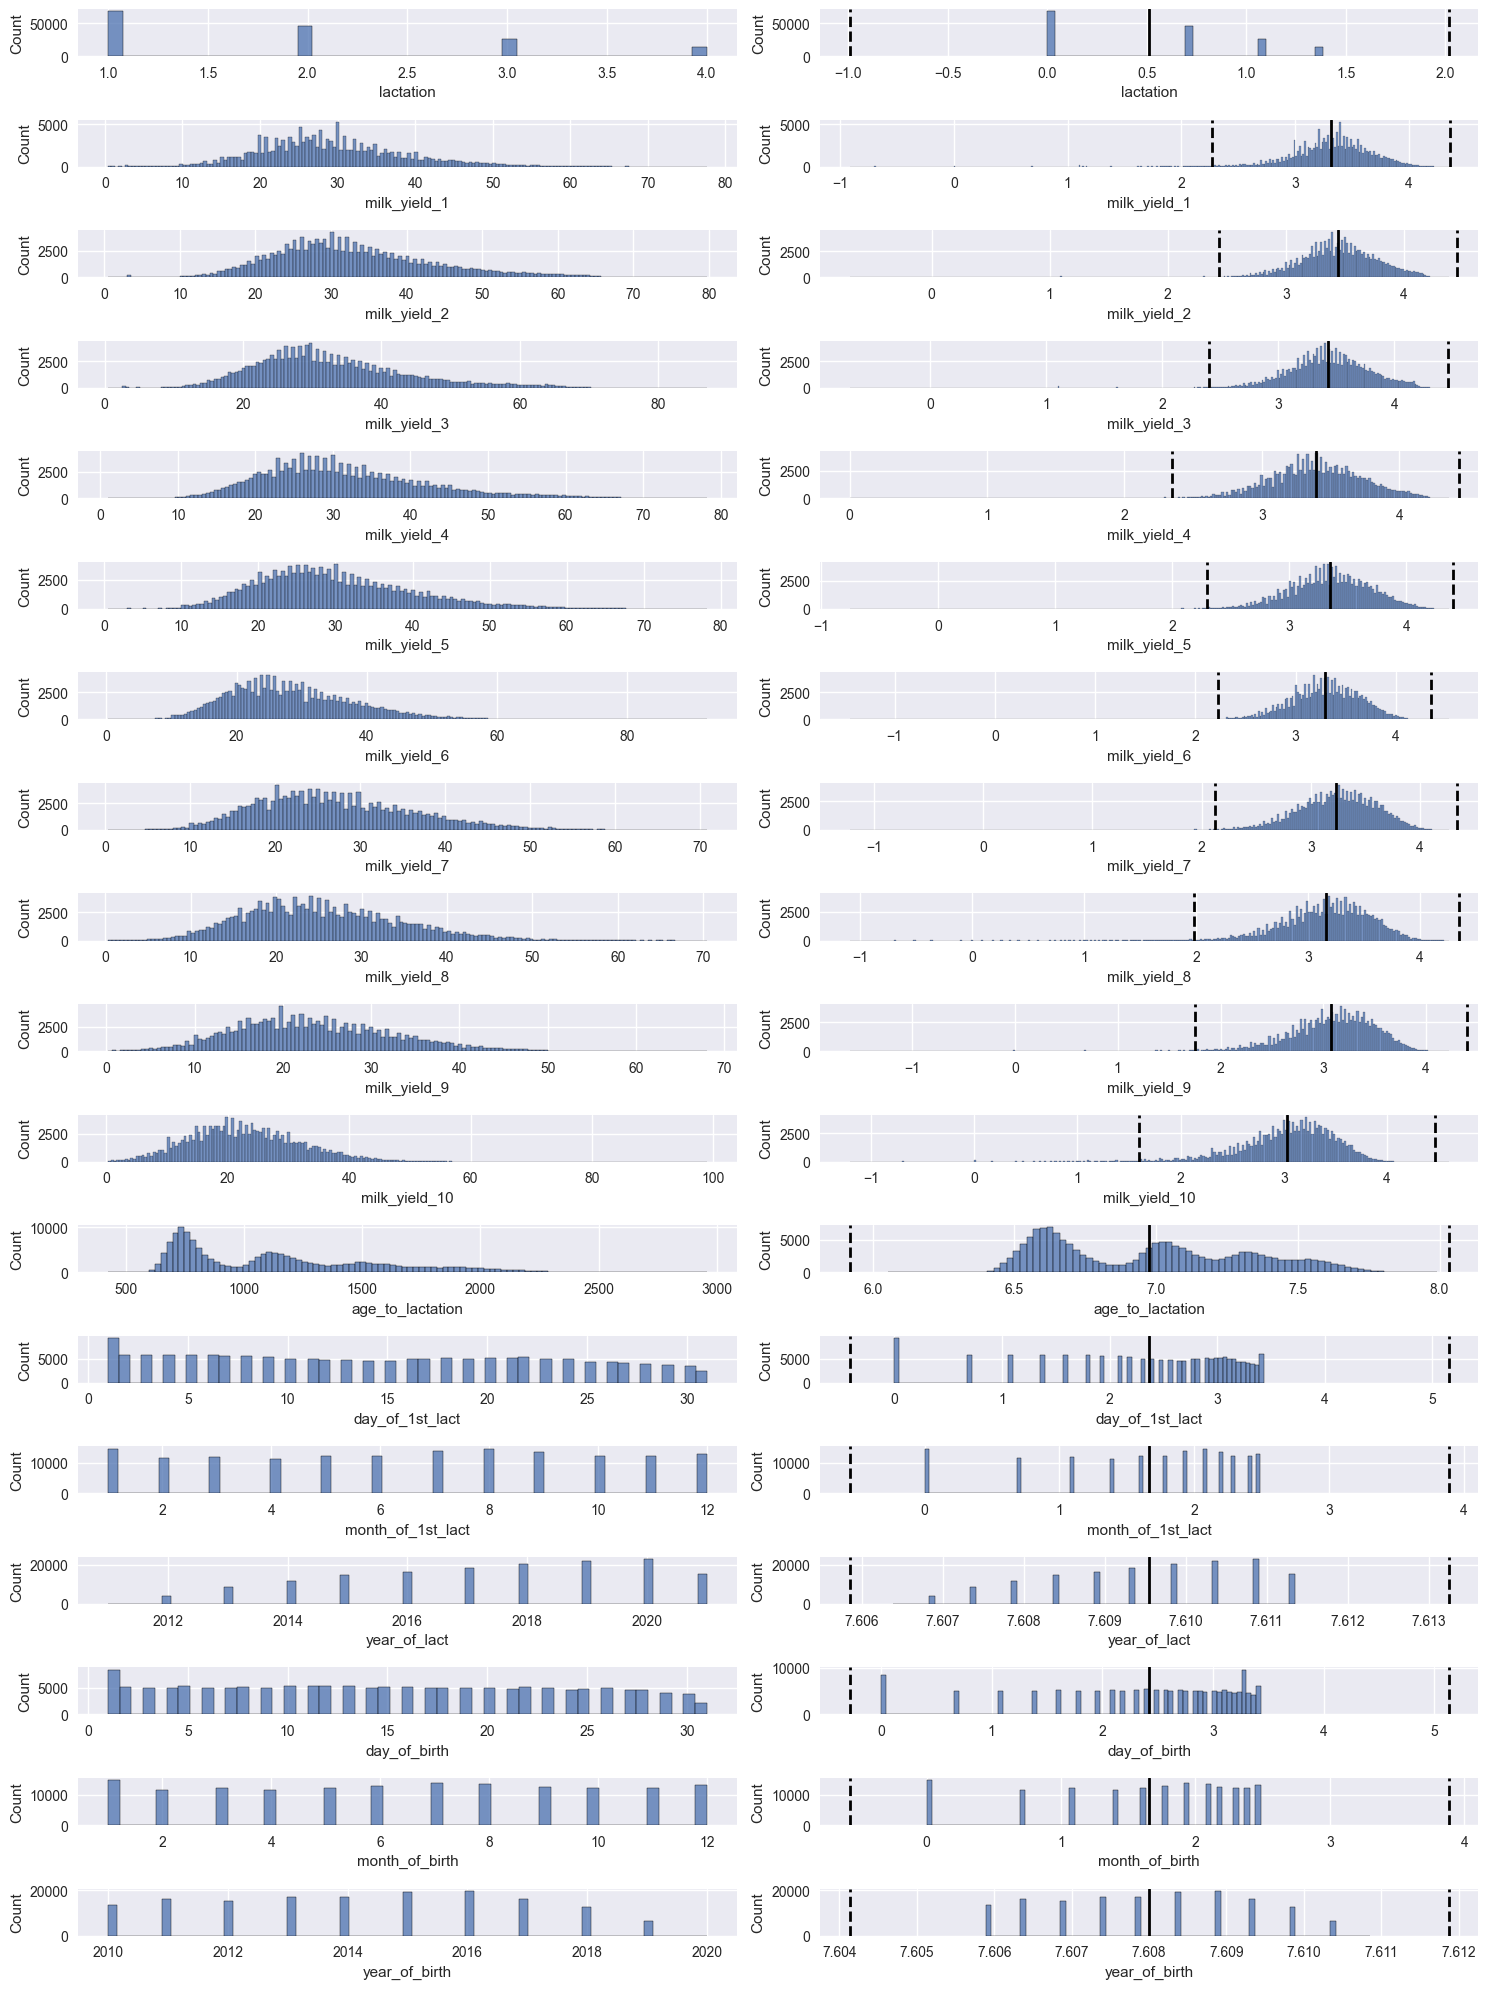

In [26]:
n = len(num_features) #количество числовых признаков
fig, axes = plt.subplots(n, 2, figsize=(15, 20)) # фигура + n х 2 координатных плоскостей
#Создаем цикл для всех признаков из списка числовых признаков
for i, target in enumerate(num_features): #i- индекс, feature - название признака в таблице
    #Строим гистограмму
    sns.histplot(data=df_joined, x=target, ax=axes[i][0]);
    #Логарифмируем
    log_target = np.log(df_joined[target])
    #Строим гистограмму в логарифмическом масштабе
    sns.histplot(data=log_target, ax=axes[i][1]);
    #Добавляем вертикальные линии для среднего и 3ех стандартных отклонений влево и вправо от среднего
    axes[i][1].axvline(log_target.mean(), color='k', lw=2)
    axes[i][1].axvline(log_target.mean() + 3 * log_target.std(),
                    color='k', ls='--', lw=2)
    axes[i][1].axvline(log_target.mean() - 3 * log_target.std(),
                    color='k', ls='--', lw=2)
plt.tight_layout() #выравнивание графиков

Избавимся от выбросов с помощью метода z-отклонений на логарифмированных признаках. 

In [27]:
#Объявляем функцию, реализующую фильтрацию выбросов по методу z-отклонений
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned
#Производим очистку 
outliers, temp_cleaned = outliers_z_score(df_joined, 'lactation', log_scale=True)
outliers, temp_cleaned = outliers_z_score(temp_cleaned, 'milk_yield_1', log_scale=True)
outliers, temp_cleaned = outliers_z_score(temp_cleaned, 'milk_yield_2', log_scale=True)
outliers, temp_cleaned = outliers_z_score(temp_cleaned, 'milk_yield_3', log_scale=True)
outliers, temp_cleaned = outliers_z_score(temp_cleaned, 'milk_yield_4', log_scale=True)
outliers, temp_cleaned = outliers_z_score(temp_cleaned, 'milk_yield_5', log_scale=True)
outliers, temp_cleaned = outliers_z_score(temp_cleaned, 'milk_yield_6', log_scale=True)
outliers, temp_cleaned = outliers_z_score(temp_cleaned, 'milk_yield_7', log_scale=True)
outliers, temp_cleaned = outliers_z_score(temp_cleaned, 'milk_yield_8', log_scale=True)
outliers, temp_cleaned = outliers_z_score(temp_cleaned, 'milk_yield_9', log_scale=True)
outliers, temp_cleaned = outliers_z_score(temp_cleaned, 'milk_yield_10', log_scale=True)
outliers, temp_cleaned = outliers_z_score(temp_cleaned, 'age_to_lactation', log_scale=True)
outliers, temp_cleaned = outliers_z_score(temp_cleaned, 'day_of_1st_lact', log_scale=True)
outliers, temp_cleaned = outliers_z_score(temp_cleaned, 'month_of_1st_lact', log_scale=True)
outliers, temp_cleaned = outliers_z_score(temp_cleaned, 'year_of_lact', log_scale=True)
outliers, temp_cleaned = outliers_z_score(temp_cleaned, 'day_of_birth', log_scale=True)
outliers, temp_cleaned = outliers_z_score(temp_cleaned, 'month_of_birth', log_scale=True)
outliers, temp_cleaned = outliers_z_score(temp_cleaned, 'year_of_birth', log_scale=True)
print('Shape before cleaning outliers: {}'.format(df_joined.shape))
print('Shape after cleaning outliers: {}'.format(temp_cleaned.shape))

Shape before cleaning outliers: (153811, 22)
Shape after cleaning outliers: (145782, 22)


Произведем кодирование категориальных признаков animal_id, mother_id, father_id, farm_and_farmgroup

In [28]:
le = LabelEncoder()
temp_cleaned['animal_id'] = le.fit_transform(temp_cleaned['animal_id'])
temp_cleaned['mother_id'] = le.fit_transform(temp_cleaned['mother_id'])
temp_cleaned['father_id'] = le.fit_transform(temp_cleaned['father_id'])
temp_cleaned['farm_and_farmgroup'] = le.fit_transform(temp_cleaned['farm_and_farmgroup'])

In [29]:
temp_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145782 entries, 0 to 155574
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   animal_id           145782 non-null  int32  
 1   lactation           145782 non-null  int64  
 2   milk_yield_1        145782 non-null  float64
 3   milk_yield_2        145782 non-null  float64
 4   milk_yield_3        145782 non-null  float64
 5   milk_yield_4        145782 non-null  float64
 6   milk_yield_5        145782 non-null  float64
 7   milk_yield_6        145782 non-null  float64
 8   milk_yield_7        145782 non-null  float64
 9   milk_yield_8        145782 non-null  float64
 10  milk_yield_9        145782 non-null  float64
 11  milk_yield_10       145782 non-null  float64
 12  mother_id           145782 non-null  int32  
 13  father_id           145782 non-null  int32  
 14  age_to_lactation    145782 non-null  int32  
 15  day_of_1st_lact     145782 non-null  in

In [30]:
dataset = temp_cleaned.copy()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145782 entries, 0 to 155574
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   animal_id           145782 non-null  int32  
 1   lactation           145782 non-null  int64  
 2   milk_yield_1        145782 non-null  float64
 3   milk_yield_2        145782 non-null  float64
 4   milk_yield_3        145782 non-null  float64
 5   milk_yield_4        145782 non-null  float64
 6   milk_yield_5        145782 non-null  float64
 7   milk_yield_6        145782 non-null  float64
 8   milk_yield_7        145782 non-null  float64
 9   milk_yield_8        145782 non-null  float64
 10  milk_yield_9        145782 non-null  float64
 11  milk_yield_10       145782 non-null  float64
 12  mother_id           145782 non-null  int32  
 13  father_id           145782 non-null  int32  
 14  age_to_lactation    145782 non-null  int32  
 15  day_of_1st_lact     145782 non-null  in

<Axes: >

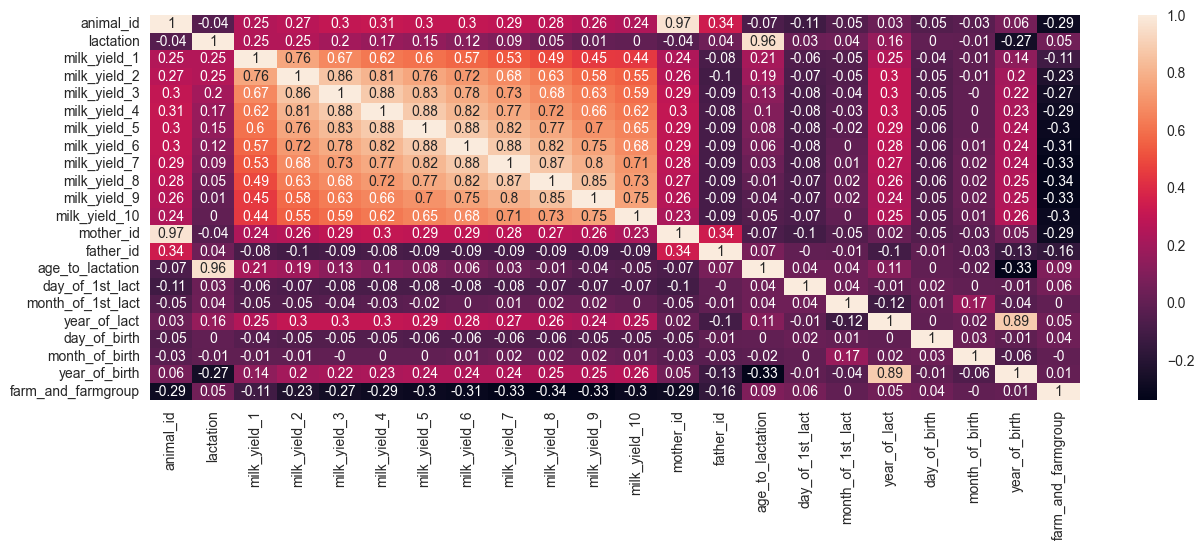

In [31]:
#строим тепловую карту корреляций
fig = plt.figure(figsize=(15, 5))
map_data = dataset.select_dtypes(exclude=['object'])
sns.heatmap(round(map_data.corr(),2), annot=True)

In [32]:
dataset = dataset.drop([
    'mother_id',
    'age_to_lactation',
    'year_of_birth'], axis=1
)
dataset.head()

,animal_id,lactation,milk_yield_1,milk_yield_2,milk_yield_3,milk_yield_4,milk_yield_5,milk_yield_6,milk_yield_7,milk_yield_8,milk_yield_9,milk_yield_10,father_id,day_of_1st_lact,month_of_1st_lact,year_of_lact,day_of_birth,month_of_birth,farm_and_farmgroup
0,0,1,19.2,21.4,26.3,30.7,28.6,28.1,26.3,31.1,25.5,26.1,412,11,11,2018,2,10,19
1,1,1,16.7,15.9,14.4,20.4,14.3,23.2,21.0,22.0,23.3,22.5,277,1,5,2013,19,5,19
2,2,1,15.8,14.4,19.3,23.1,31.8,24.7,30.9,32.3,32.7,33.1,92,17,5,2013,1,6,19
3,2,2,43.7,39.9,39.2,33.2,40.3,44.8,39.3,40.1,40.5,37.7,92,16,6,2014,1,6,19
4,3,1,13.8,13.2,29.9,26.4,31.3,17.6,25.8,25.6,24.5,19.8,294,18,5,2013,11,7,19


<Axes: >

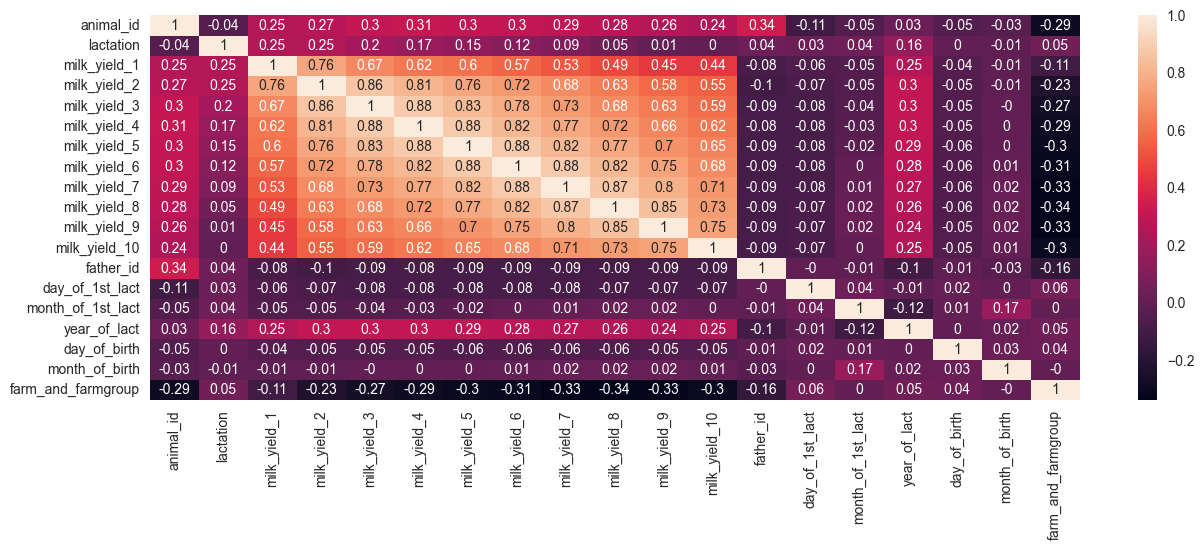

In [33]:
#строим тепловую карту корреляций
fig = plt.figure(figsize=(15, 5))
map_data = dataset.select_dtypes(exclude=['object'])
sns.heatmap(round(map_data.corr(),2), annot=True)

In [34]:
y = dataset[['milk_yield_3', 'milk_yield_4', 'milk_yield_5', 'milk_yield_6', 'milk_yield_7', 'milk_yield_8', 'milk_yield_9', 'milk_yield_10']]
X = dataset.drop(['milk_yield_3', 'milk_yield_4', 'milk_yield_5', 'milk_yield_6', 'milk_yield_7', 'milk_yield_8', 'milk_yield_9', 'milk_yield_10'], axis=1)

In [35]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145782 entries, 0 to 155574
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   animal_id           145782 non-null  int32  
 1   lactation           145782 non-null  int64  
 2   milk_yield_1        145782 non-null  float64
 3   milk_yield_2        145782 non-null  float64
 4   father_id           145782 non-null  int32  
 5   day_of_1st_lact     145782 non-null  int32  
 6   month_of_1st_lact   145782 non-null  int32  
 7   year_of_lact        145782 non-null  int32  
 8   day_of_birth        145782 non-null  int32  
 9   month_of_birth      145782 non-null  int32  
 10  farm_and_farmgroup  145782 non-null  int32  
dtypes: float64(2), int32(8), int64(1)
memory usage: 8.9 MB


In [36]:
# Отбираем числовые признаки
numeric_features = X.select_dtypes(include=['float64', 'int64', 'int32']).columns

# Нормализуем числовые признаки
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X[numeric_features])
X_scaler = pd.DataFrame(X_scaler, columns=numeric_features)
X_scaler.head()

,animal_id,lactation,milk_yield_1,milk_yield_2,father_id,day_of_1st_lact,month_of_1st_lact,year_of_lact,day_of_birth,month_of_birth,farm_and_farmgroup
0,-1.728744,-0.914390,-1.143378,-1.145368,-0.856237,-0.390659,1.289242,0.236691,-1.476649,1.010262,-0.903295
1,-1.728698,-0.914390,-1.418024,-1.674981,-1.017574,-1.518072,-0.446164,-1.785043,0.452694,-0.429704,-0.903295
2,-1.728652,-0.914390,-1.516896,-1.819421,-1.238665,0.285789,-0.446164,-1.785043,-1.590140,-0.141711,-0.903295
3,-1.728652,0.114069,1.548145,0.636058,-1.238665,0.173048,-0.156930,-1.380696,-1.590140,-0.141711,-0.903295
4,-1.728606,-0.914390,-1.736612,-1.934973,-0.997257,0.398530,-0.446164,-1.785043,-0.455232,0.146282,-0.903295


In [37]:
#Создаем тренировочную и тестовую выборки с помощью train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaler, y, #таблица с наблюдениями и столбец с правильным ответами
    test_size=0.2, #размер тестовой выборки
    random_state=42 #число отвечающее за генерацию случайных чисел
)
#Выводим размеры полученных выборок
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (116625, 11)
Test shape: (29157, 11)


In [38]:
# функция для расчета метрик
def print_metrics(y_train, y_train_predict, y_test, y_test_predict):
    print('Train R^2: {:.3f}'.format(metrics.r2_score(y_train, y_train_predict)))
    print('Train MAE: {:.2f}'.format(metrics.mean_absolute_error(y_train, y_train_predict)))
    print('Train MAPE: {:.3f}'.format(metrics.mean_absolute_percentage_error(y_train, y_train_predict)))
    print('\n')
    print('Test R^2: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict)))
    print('Test MAE: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_test_predict)))
    print('Test MAPE: {:.3f}'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict)))

In [39]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
display(rf.score(X_train, y_train))

0.9532962477786633

In [40]:
# Пример предсказания для тестовых данных и расчет точности
y_test_pred = rf.predict(X_test)
y_train_pred = rf.predict(X_train)
# Выводим результирующие метрики
print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.953
Train MAE: 1.51
Train MAPE: 0.064


Test R^2: 0.668
Test MAE: 4.06
Test MAPE: 0.171


In [41]:
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print('RMSE: %f' % (rmse))

RMSE: 5.418544


Оптимизация гиперпараметров

In [42]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rs = RandomizedSearchCV(rf, 
                        param_dist, 
                        n_iter = 100, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=0)
rs.fit(X_train, y_train)
rs.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 115,
 'min_samples_split': 23,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 15,
 'bootstrap': False}

In [43]:
rs_df = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)
rs_df.head(10)

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,mean_test_score,rank_test_score
0,115,23,2,sqrt,15,False,0.668172,1
1,136,23,7,log2,15,False,0.667972,2
2,73,23,2,sqrt,14,False,0.666051,3
3,136,12,2,sqrt,13,False,0.664831,4
4,157,28,12,sqrt,14,True,0.661968,5
5,10,2,18,sqrt,15,False,0.661494,6
6,94,12,18,sqrt,13,False,0.661309,7
7,52,2,23,log2,14,False,0.661238,8
8,115,50,23,sqrt,14,False,0.661177,9
9,52,28,7,log2,13,True,0.659669,10


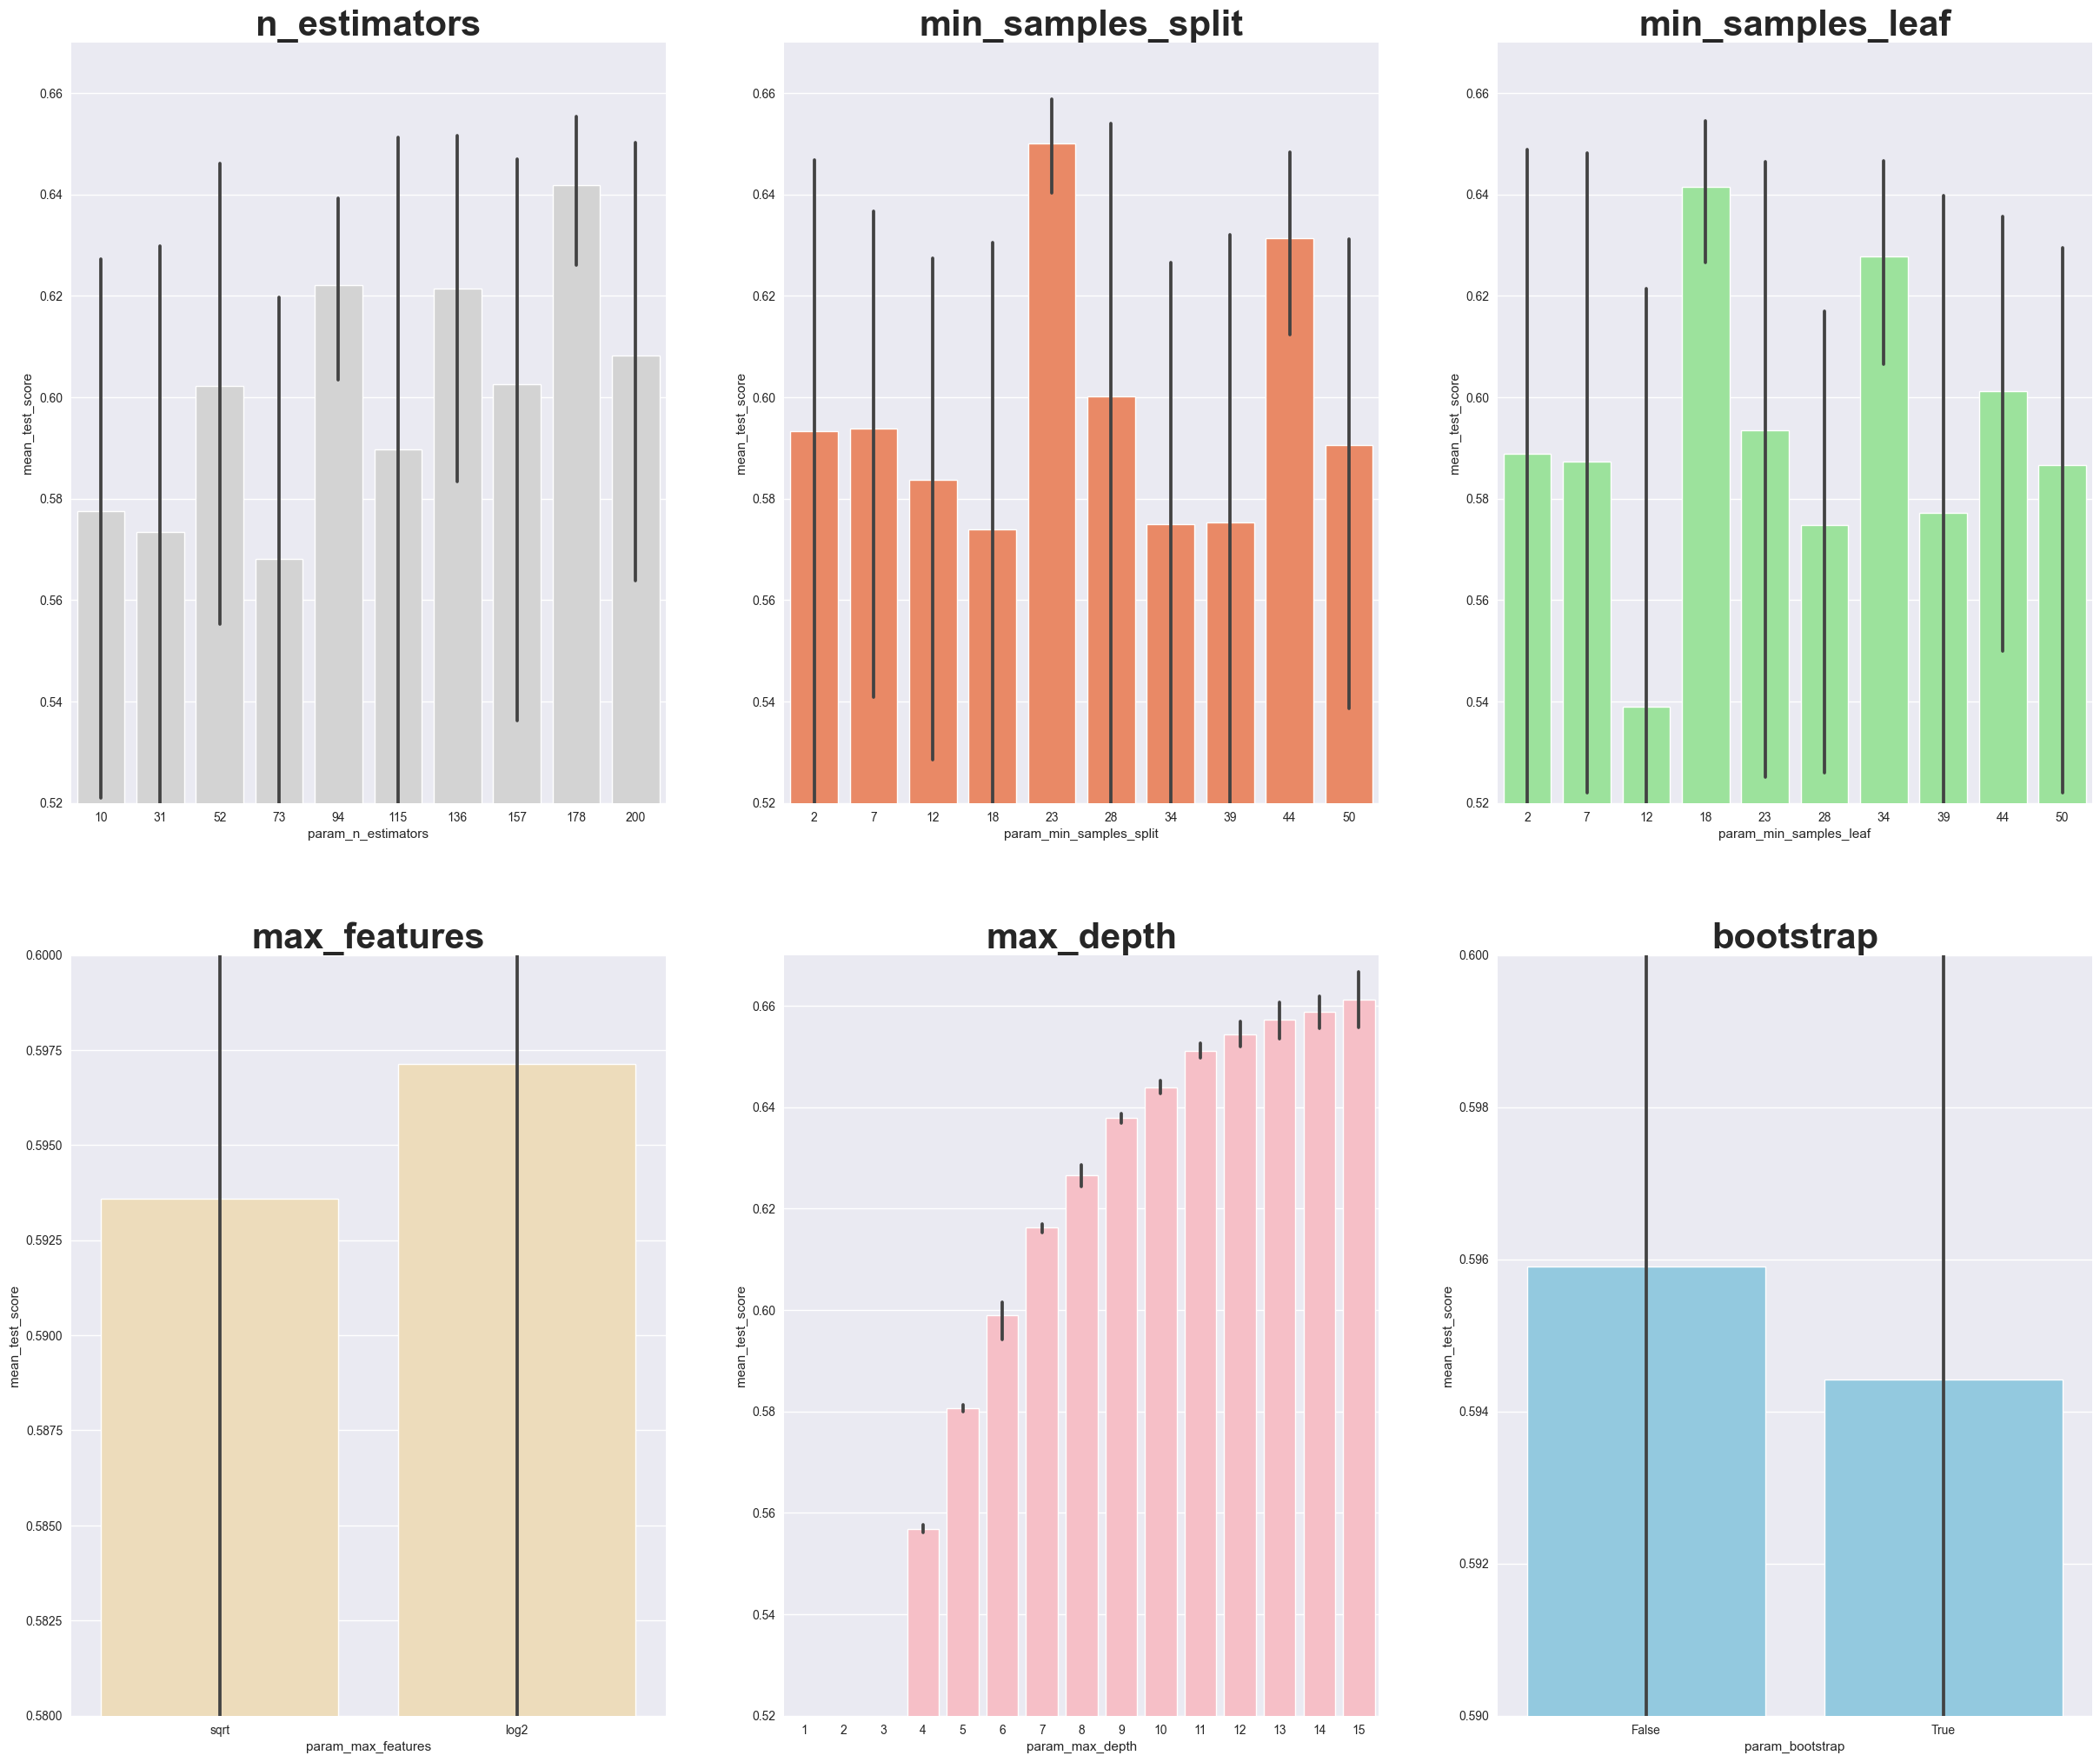

In [44]:
fig, axs = plt.subplots(ncols=3, nrows=2)
sns.set(style="whitegrid", color_codes=True, font_scale = 2)
fig.set_size_inches(30,25)
sns.barplot(x='param_n_estimators', y='mean_test_score', data=rs_df, ax=axs[0,0], color='lightgrey')
axs[0,0].set_ylim([.52,.67]),axs[0,0].set_title(label = 'n_estimators', size=30, weight='bold')
sns.barplot(x='param_min_samples_split', y='mean_test_score', data=rs_df, ax=axs[0,1], color='coral')
axs[0,1].set_ylim([.52,.67]),axs[0,1].set_title(label = 'min_samples_split', size=30, weight='bold')
sns.barplot(x='param_min_samples_leaf', y='mean_test_score', data=rs_df, ax=axs[0,2], color='lightgreen')
axs[0,2].set_ylim([.52,.67]),axs[0,2].set_title(label = 'min_samples_leaf', size=30, weight='bold')
sns.barplot(x='param_max_features', y='mean_test_score', data=rs_df, ax=axs[1,0], color='wheat')
axs[1,0].set_ylim([.58,.60]),axs[1,0].set_title(label = 'max_features', size=30, weight='bold')
sns.barplot(x='param_max_depth', y='mean_test_score', data=rs_df, ax=axs[1,1], color='lightpink')
axs[1,1].set_ylim([.52,.67]),axs[1,1].set_title(label = 'max_depth', size=30, weight='bold')
sns.barplot(x='param_bootstrap',y='mean_test_score', data=rs_df, ax=axs[1,2], color='skyblue')
axs[1,2].set_ylim([.59,.60])
axs[1,2].set_title(label = 'bootstrap', size=30, weight='bold')
plt.show()

In [45]:
rf = RandomForestRegressor(
    n_estimators=115, max_features ='log2', min_samples_leaf=2, min_samples_split=23, 
                                 max_depth=15, bootstrap=False
)
rf.fit(X_train, y_train)
display(rf.score(X_train, y_train))

0.7441024587684554

In [46]:
# Пример предсказания для тестовых данных и расчет точности
y_test_pred = rf.predict(X_test)
y_train_pred = rf.predict(X_train)
# Выводим результирующие метрики
print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.744
Train MAE: 3.59
Train MAPE: 0.153


Test R^2: 0.673
Test MAE: 4.05
Test MAPE: 0.171


In [47]:
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print('RMSE: %f' % (rmse))

RMSE: 5.379319


In [48]:
# Сохранение модели 'RandomForestRegressor' в файл pickle
pickle.dump(rf, open('model.pkl', 'wb'))

In [49]:
# Загрузка данных из файла X_test_public.csv
data = pd.read_csv("data/X_test_public.csv")
df_pedigree = pd.read_csv("data/pedigree.csv")
  
# объединение данных из файла X_test_public.csv и pedigree.csv
data = data.join(
df_pedigree.set_index('animal_id'),
    on='animal_id',
    how='left'
)
data = data.drop(['Unnamed: 0'], axis=1)

In [50]:
data

,animal_id,lactation,calving_date,farm,farmgroup,birth_date,milk_yield_1,milk_yield_2,mother_id,father_id
0,ID_0001170122,3,2022-05-13,2580,5719,2018-06-22,47.90,63.75,ID_0001184253,ID_0000864448
1,ID_0000957620,2,2021-10-30,2730,6141,2018-11-29,15.25,31.68,ID_0000944107,ID_0000863399
2,ID_0000824914,1,2022-01-24,2683,5951,2020-04-05,29.70,30.00,ID_0000824913,ID_0000796243
3,ID_0000930702,2,2022-06-23,2536,5693,2019-06-22,34.40,47.40,ID_0000931414,ID_0000863787
4,ID_0001115068,1,2021-12-12,2448,5254,2020-01-30,8.00,20.00,ID_0001115326,ID_0000783629
...,...,...,...,...,...,...,...,...,...,...
11973,ID_0000843018,1,2022-07-23,2824,6403,2020-11-17,22.10,25.40,ID_0000840805,ID_0000839885
11974,ID_0000787488,1,2021-12-09,2767,6265,2020-01-02,28.40,28.80,ID_0000787473,ID_0000787456
11975,ID_0000824670,1,2022-04-20,2683,5951,2020-04-16,30.00,31.90,ID_0000824662,ID_0000796243
11976,ID_0000925065,1,2021-11-23,2536,5693,2019-12-01,30.00,38.00,ID_0000924918,ID_0000924314


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11978 entries, 0 to 11977
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   animal_id     11978 non-null  object 
 1   lactation     11978 non-null  int64  
 2   calving_date  11978 non-null  object 
 3   farm          11978 non-null  int64  
 4   farmgroup     11978 non-null  int64  
 5   birth_date    11978 non-null  object 
 6   milk_yield_1  11978 non-null  float64
 7   milk_yield_2  11978 non-null  float64
 8   mother_id     11973 non-null  object 
 9   father_id     11977 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 935.9+ KB


In [52]:
# переведем данные в фармат "дата"
data['calving_date'] = pd.to_datetime(data['calving_date']) 
data['birth_date'] = pd.to_datetime(data['birth_date'])
    
data['age_to_lactation'] = data['calving_date'] - data['birth_date']
data['day_of_1st_lact'] = data['calving_date'].dt.day
data['month_of_1st_lact'] = data['calving_date'].dt.month
data['year_of_lact'] = data['calving_date'].dt.year
data['day_of_birth'] = data['birth_date'].dt.day
data['month_of_birth'] = data['birth_date'].dt.month
data['year_of_birth'] = data['birth_date'].dt.year  

In [53]:
data = data.dropna(subset=['mother_id'])
data = data.dropna(subset=['father_id'])  
    
data['age_to_lactation'] = data['age_to_lactation'].astype(str)
data['age_to_lactation'] = data['age_to_lactation'].str.replace(' days', '',  regex=True)
data['age_to_lactation'] = data['age_to_lactation'].astype(int)   
    
data = data.drop(['calving_date', 'birth_date'], axis=1)
    
data['farm'] = data['farm'].astype(str)
data['farmgroup'] = data['farmgroup'].astype(str)
data['farm_and_farmgroup'] = data['farm'] + '_' + data['farmgroup'] 
    
data = data.drop(['farm', 'farmgroup'], axis=1)
    
le = LabelEncoder()
data['animal_id'] = le.fit_transform(data['animal_id'])
data['mother_id'] = le.fit_transform(data['mother_id'])
data['father_id'] = le.fit_transform(data['father_id'])
data['farm_and_farmgroup'] = le.fit_transform(data['farm_and_farmgroup'])   
    
data = data.drop([
    'mother_id',
    'age_to_lactation',
    'year_of_birth'], axis=1
)
    
# Отбираем все признаки с сохранением названий столбцов
numeric_features = data.select_dtypes(include=['float64', 'int64', 'int32']).columns
# Нормализуем числовые признаки
scaler = StandardScaler()
X_scaler = scaler.fit_transform(data[numeric_features])
data = pd.DataFrame(X_scaler, columns=numeric_features)

data

,animal_id,lactation,milk_yield_1,milk_yield_2,father_id,day_of_1st_lact,month_of_1st_lact,year_of_lact,day_of_birth,month_of_birth,farm_and_farmgroup
0,1.333215,1.094198,1.541290,2.609304,1.268136,-0.179588,-0.409689,0.607943,0.766084,-0.104206,-0.698573
1,0.352978,0.081612,-1.791958,-0.530922,1.053603,1.699292,0.952414,-1.644890,1.557933,1.293267,0.266619
2,-0.884470,-0.930973,-0.316754,-0.695424,-0.056192,1.036158,-1.499371,0.607943,-1.156978,-0.663196,-0.409016
3,0.013888,0.081612,0.163071,1.008347,1.160869,0.925635,-0.137268,0.607943,0.766084,-0.104206,-0.939872
4,1.209673,-0.930973,-2.532113,-1.674603,-0.596650,-0.290111,1.497255,-1.644890,1.671055,-1.501679,-1.422468
...,...,...,...,...,...,...,...,...,...,...,...
11968,-0.583281,-0.930973,-1.092640,-1.145847,0.183094,0.925635,0.135152,0.607943,0.200478,1.293267,1.617889
11969,-1.345656,-0.930973,-0.449471,-0.812926,-0.278977,-0.621678,1.497255,-1.644890,-1.496342,-1.501679,0.845735
11970,-0.901251,-0.930973,-0.286126,-0.509380,-0.056192,0.594068,-0.682109,0.607943,0.087357,-0.663196,-0.409016
11971,-0.062205,-0.930973,-0.286126,0.087919,1.569307,0.925635,1.224834,-1.644890,-1.609463,1.572761,-0.939872


In [ ]:
from Hacks.milk_forecasting.baseline import fit


def predict(model, data):
    model = rf
    
    # Загрузка данных тестового датасета
    test_data = pd.read_csv(data)

    # Прогнозирование результатов
    predictions = model.predict(test_data.drop(["animal_id", "lactation"], axis=1))

    # Создание датафрейма с прогнозами
    result = pd.DataFrame({
        "animal_id": test_data["animal_id"],
        "lactation": test_data["lactation"],
        "milk_yield_3": test_data["milk_yield_3"],
        "milk_yield_4": test_data["milk_yield_4"],
        "milk_yield_5": test_data["milk_yield_5"],
        "milk_yield_6": test_data["milk_yield_6"],
        "milk_yield_7": test_data["milk_yield_7"],
        "milk_yield_8": test_data["milk_yield_8"],
        "milk_yield_9": test_data["milk_yield_9"],
        "milk_yield_10": test_data["milk_yield_10"],
        "Prediction": predictions
    })

    return result

trained_model = fit()
predictions = predict(trained_model, "data/X_test_public.csv")
print(predictions)